In [21]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 商品表的合并，从而进行分析
prior = pd.read_csv("./data/instacart/order_products__prior.csv")
products = pd.read_csv("./data/instacart/products.csv")
order = pd.read_csv("./data/instacart/orders.csv")
aisles = pd.read_csv("./data/instacart/aisles.csv")
# 合并表
mg = pd.merge(prior, products, on=['product_id', 'product_id'])
mg = pd.merge(mg, order, on=['order_id', 'order_id'])
mt = pd.merge(mg, aisles, on=['aisle_id', 'aisle_id'])

In [3]:
# 建立交叉表，分析列之间的关系
table = pd.crosstab(mt['user_id'], mt['aisle'])

In [4]:
table.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [5]:
pca = PCA(n_components=0.9)
data = pca.fit_transform(table)

In [8]:
data.shape

(206209, 27)

In [9]:
data

array([[ -2.42156587e+01,   2.42942720e+00,  -2.46636975e+00, ...,
          6.86800336e-01,   1.69439402e+00,  -2.34323022e+00],
       [  6.46320806e+00,   3.67511165e+01,   8.38255336e+00, ...,
          4.12121252e+00,   2.44689740e+00,  -4.28348478e+00],
       [ -7.99030162e+00,   2.40438257e+00,  -1.10300641e+01, ...,
          1.77534453e+00,  -4.44194030e-01,   7.86665571e-01],
       ..., 
       [  8.61143331e+00,   7.70129866e+00,   7.95240226e+00, ...,
         -2.74252456e+00,   1.07112531e+00,  -6.31925661e-02],
       [  8.40862199e+01,   2.04187340e+01,   8.05410372e+00, ...,
          7.27554259e-01,   3.51339470e+00,  -1.79079914e+01],
       [ -1.39534562e+01,   6.64621821e+00,  -5.23030367e+00, ...,
          8.25329076e-01,   1.38230701e+00,  -2.41942061e+00]])

In [11]:
cust = data[:500]

In [13]:
cust.shape

(500, 27)

In [14]:
# 聚类分析
km = KMeans(n_clusters=4)

In [15]:
km.fit(cust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
predict = km.predict(cust)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

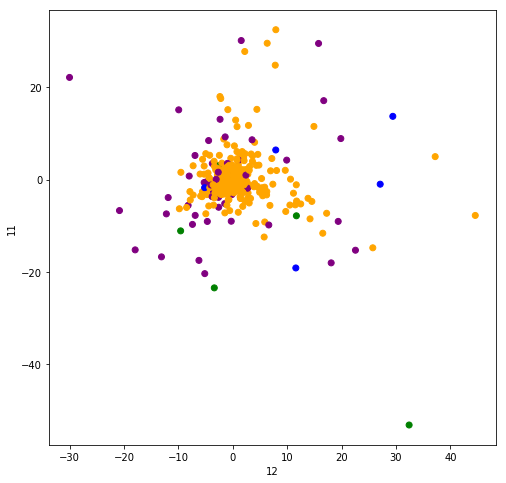

In [20]:
# 展示数据
plt.figure(figsize=(8,8))
# 对每个类别标记颜色
color = ['orange', 'blue', 'purple','green']

colored = [color[i] for i in predict]

plt.scatter(cust[:, 12], cust[:, 11], color=colored)

plt.xlabel("12")
plt.ylabel("11")

plt.show()

In [22]:
# 进行轮廓系数计算
silhouette_score(cust, predict)

0.63942630944315804